### Etapa preliminar

#### Importando bibliotecas do Python

In [2]:
import numpy as np                      #biblioteca de computação científica
import matplotlib.pyplot as plt         #biblioteca para a geração de gráficos 2D
import math                             #biblioteca de funções matemáticas

#### Definindo uma função

In [3]:
def f(x): return x**3 - x - 1

#### Função para desenhar o gráfico de f(x)

In [4]:
def grafico(f, min=-10, max=10, n=1000):
    x = np.linspace(min,max,n)
    plt.plot(x,f(x))
    plt.grid()
    plt.show()

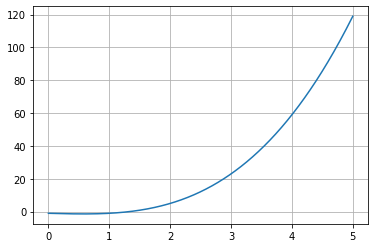

In [5]:
grafico(f, 0, 5)

#### 1 - ISOLAMENTO DE RAÍZES

In [6]:
def isola(f,min=-100, max=100):
    for i in range(min,max+1,1):
        if f(i)*f(i+1) < 0:
            print('(%.2f, %.2f)' %(i,i+1))

In [7]:
isola(f)

(1.00, 2.00)


#### 2 - REFINAMENTO

##### Método da Bissecção

In [8]:
def bissecao(f, a, b, es=0.5, n=100):
    i = 0
    fa = f(a)
    fb = f(b)
    p = a
    #iteracao da bissecao
    print('{:<}{:^12}{:^8}{:^10}{:^8}{:^8}{:^10}{:^8}'.format('i','a','b','x','f(a)','f(b)','f(x)','ea'))
    while (i <= n):
        p0 = p
        p = (a + b)/2
        fp = f(p)
        ea = abs((p - p0)/p)*100
        print('%d %8.4f %8.4f %8.4f %8.4f %8.4f %8.4f %8.4f' %(i,a,b,p,fa,fb,fp,ea))
        #testando condicao de parada
        if fp == 0 or ea < es:
            return p  
        #bissecciona o intervalo
        if (fa * fp > 0):   # se True, então o zero de f está em [p, b]
            a = p
            fa = fp
        else:        # o zero de f está em [a, p]
            b = p
            fb = fp
        i = i+1

In [9]:
bissecao(f, 1, 2, es=0.1)

i     a         b        x       f(a)    f(b)     f(x)      ea   
0   1.0000   2.0000   1.5000  -1.0000   5.0000   0.8750  33.3333
1   1.0000   1.5000   1.2500  -1.0000   0.8750  -0.2969  20.0000
2   1.2500   1.5000   1.3750  -0.2969   0.8750   0.2246   9.0909
3   1.2500   1.3750   1.3125  -0.2969   0.2246  -0.0515   4.7619
4   1.3125   1.3750   1.3438  -0.0515   0.2246   0.0826   2.3256
5   1.3125   1.3438   1.3281  -0.0515   0.0826   0.0146   1.1765
6   1.3125   1.3281   1.3203  -0.0515   0.0146  -0.0187   0.5917
7   1.3203   1.3281   1.3242  -0.0187   0.0146  -0.0021   0.2950
8   1.3242   1.3281   1.3262  -0.0021   0.0146   0.0062   0.1473
9   1.3242   1.3262   1.3252  -0.0021   0.0062   0.0020   0.0737


1.3251953125

In [10]:
bissecao(f,1,2, es=0.1)

i     a         b        x       f(a)    f(b)     f(x)      ea   
0   1.0000   2.0000   1.5000  -1.0000   5.0000   0.8750  33.3333
1   1.0000   1.5000   1.2500  -1.0000   0.8750  -0.2969  20.0000
2   1.2500   1.5000   1.3750  -0.2969   0.8750   0.2246   9.0909
3   1.2500   1.3750   1.3125  -0.2969   0.2246  -0.0515   4.7619
4   1.3125   1.3750   1.3438  -0.0515   0.2246   0.0826   2.3256
5   1.3125   1.3438   1.3281  -0.0515   0.0826   0.0146   1.1765
6   1.3125   1.3281   1.3203  -0.0515   0.0146  -0.0187   0.5917
7   1.3203   1.3281   1.3242  -0.0187   0.0146  -0.0021   0.2950
8   1.3242   1.3281   1.3262  -0.0021   0.0146   0.0062   0.1473
9   1.3242   1.3262   1.3252  -0.0021   0.0062   0.0020   0.0737


1.3251953125

##### Método de Newton-Raphson

In [11]:
#Definindo a função
def f(x): return x**3 - x - 1
def f_(x): return 3*x**3 - x - 1

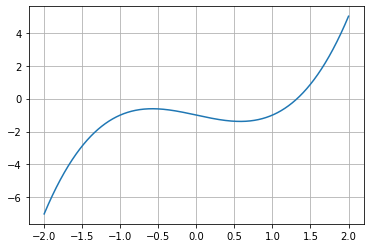

In [12]:
grafico(f,-2,2)


In [13]:
def newtonraphson(f, f_, x0, fs=0.00001, es=0.5, NMAX=100):
    n=1
    print('{:<}{:>7}{:>10}{:>10}'.format('i','x','f(x)','ea(%)'))
    while n<=NMAX:
        #testando condicao de parada 
        x1 = x0 - (f(x0)/f_(x0))
        y = f(x1)
        ea = abs((x1 - x0)/x1)*100
        print('%d %8.4f %8.4f %8.4f' %(n,x1,y,ea))
        if ea < es or f(x1) < fs :
            return x1
        else:
            x0 = x1
        n += 1

In [14]:
newtonraphson(f, f_,2)

i      x      f(x)     ea(%)
1   1.7619   2.7076  13.5135
2   1.5635   1.2585  12.6900
3   1.4221   0.4541   9.9404
4   1.3490   0.1058   5.4234
5   1.3279   0.0135   1.5884
6   1.3250   0.0012   0.2173


1.325000059938332

##### Método da Secante

In [15]:
def secante(f, x0, x1, es=0.5, NMAX=100):
    n=1
    ea = 100
    print('{:<}{:>7}{:>10}{:>10}'.format('i','x','f(x)','ea(%)'))
    while n<=NMAX:
        x2 = (x0*f(x1)-x1*f(x0)) / (f(x1)-f(x0))
        ea = abs((x2 - x1)/x2)*100
        print('%d %8.4f %8.4f %8.4f' %(n,x2,f(x2),ea))
        if ea < es:
            return x2
        else:
            x0 = x1
            x1 = x2
        n += 1


In [16]:
secante(f, 1, 2)

i      x      f(x)     ea(%)
1   1.1667  -0.5787  71.4286
2   1.2531  -0.2854   6.8985
3   1.3372   0.0539   6.2888
4   1.3239  -0.0037   1.0089
5   1.3247  -0.0000   0.0648


1.3247079365320882

### Biblioteca ***scipy*** do Python

In [28]:
# Importar função "newton" do pacote "optimize" da bibliotece "scipy"  
from scipy.optimize import newton  

# Aplicando o Método de Newton-Raphson
newton(f, 2, f_, tol=0.01)

1.325000059938332

In [29]:
# Agora use a função programada anteriormente  
newtonraphson(f, f_, 2)

i      x      f(x)     ea(%)
1   1.7619   2.7076  13.5135
2   1.5635   1.2585  12.6900
3   1.4221   0.4541   9.9404
4   1.3490   0.1058   5.4234
5   1.3279   0.0135   1.5884
6   1.3250   0.0012   0.2173


1.325000059938332

In [33]:
# Aplicando o Método da Secante
newton(f, x0=1, x1=2)

1.3247179572446701

In [37]:
# Agora use a função programada anteriormente  
secante(f, 1, 2, es=0.01)

i      x      f(x)     ea(%)
1   1.1667  -0.5787  71.4286
2   1.2531  -0.2854   6.8985
3   1.3372   0.0539   6.2888
4   1.3239  -0.0037   1.0089
5   1.3247  -0.0000   0.0648
6   1.3247   0.0000   0.0008


1.3247179653538177